# When a Precision-Recall Curve Is Preferred over a ROC Curve

In our data science bootcamp at Flatiron, we covered the ROC curve, which is a metric used to determine how well our logistic regression model is performing. It plots the true positive rate--True Positives/(True Positives + False Negatives)--on the y-axis and the false positive rate--False Positives/(False Positives + True Negatives)--on the x-axis for different thresholds. "What's a threshold?" you may ask. Let's rewind a bit.

Logistic regression is a classification model that outputs log odds, which we can convert into probabilities of an outcome occurring. Based on the threshold we set, that probability will become either a 0 or a 1. If we set the threshold at 0.5 for a heart disease model for instance, then any person with a greater than 50% chance of having heart disease based on our model will be categorized as having heart disease. 

Now, back to the ROC curve. Looking at this curve, we can determine the best threshold to set given our model objectives (i.e. do we care more about maximizing correctly predicting true positives or minimizing incorrectly predicting false positives). In an ideal world, we correctly predict all true positives and do not incorrectly predict any false positives. In practice, however, that is rarely the case. Moreover, there is a trade-off between a higher true positive rate and a lower false positive rate based on how we set the threshold. If we lower the threshold such that those who have a 10% chance of having heart disease are classified as having heart disease, then we are more likely to correctly catch those who actually do have heart disease, but we are also more likely to tell a bunch of people who don't have heart disease that they do.

This is a useful tool when looking at our model performance. However, in a particularly common instance, it has a significant drawback, and a better model metric should be used. The drawback is that the ROC curve does not perform effectively when we are dealing with imbalanced data. When this is the case, the superior metric to be used is called the Precision-Recall curve.

The main difference between the ROC Curve and the Precision-Recall Curve is using precision--True Positives/(True Positives + False Positives)--instead of the false positive rate. That's because recall is actually the same as the true positive rate. So why are using precision instead of the false positive rate on imbalanced data? In short, because the false positive rate can be a misleading and inaccurate measure of a model's performance. Let's see why.

First, what do we mean by imbalanced data? In the heart disease example, imbalanced means in our data, there are significantly more cases of people without heart disease (classified as 0 in the model) than people with heart disease (classified as 1). Balanced data would be mean a 50/50 split between the two categories.

How does this negatively affect the ROC Curve? Well, the false positive rate includes True Negatives in the denominator. In an imbalanced dataset, predicting True Negatives isn't very impressive. If only 1% of people in our model have heart disease, then this means that guessing that everyone doesn't have heart disease will result in a very high success rate in predicting and a large amount of True Negatives. The resulting effect of having True Negatives in the denominator is that it lowers the false positive rate.

Let's say we have 10,000 people in our dataset and 1% of them have heart disease (100 total). Model A correctly predicts that 99/100 people have heart disease, and incorrectly predicts that another 50 people have heart disease. Model B also correctly predicts that 99/100 people have heart disease, and incorrectly predicts that another 100 people have heart disease. The recall scores are the same for each model (0.99). The false positive rates are 50/(50+9850) = .0051 and 100/(100+9800) = .0101, respectively. Looking at these two models based on ROC curve metrics, they look great and virtually similar. However, precision portrays a bit of a different picture. Precision for Model A is 99/(99+50) = .6644 and 99/(99+100) = .4975 for Model B. So as far as how good the model is at predicting the positive class (having heart disease), we would much prefer Model A. And in an imbalanced dataset, we are often much more interested in how good we are at predicting True Positives rather than True Negatives.

I hope that was a helpful lesson in why sometimes a Precision-Recall curve may be preferred over a ROC Curve. Below, I show briefly how to put a precision-recall curve into action in Python using sklearn. One other thing to note is that for both ROC and Precision-Recall curves, the area under the curve is a common metric used. Area under the curve will range from 0 to 1, with 1 being a perfect classifier. So closer to 1 means a better classification model. Thanks for reading, and as always, happy coding!

In [16]:
# Import the appropriate packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import pandas as pd

# Load the data
df = pd.read_csv('heart.csv')

# Define appropriate X and y
y = df['target']
X = df.drop(columns='target', axis=1)

# Normalize the data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

In [17]:
# Calculate the probability scores of each of the datapoints:
y_score = model_log.decision_function(X_test)

# Isolate precision and recall using precision recall curve function
precision,recall,thresholds = precision_recall_curve(y_test,y_score)

In [18]:
# Calculate area under the curve
print('AUC: {}'.format(auc(recall, precision)))

AUC: 0.8860913443747522


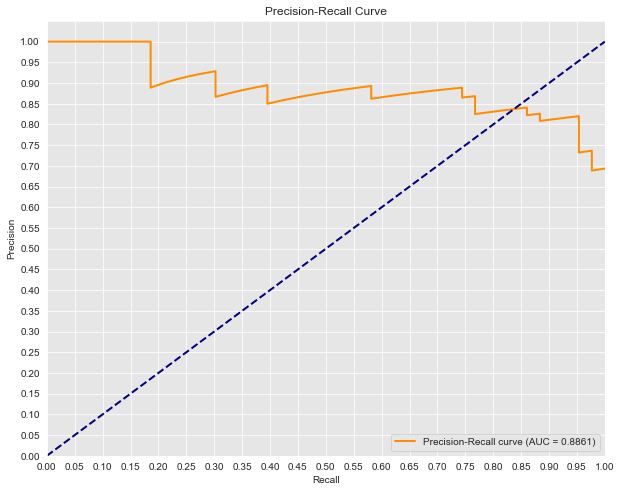

In [19]:
# Import graphing packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot a Precision-Recall Curve
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Precision-Recall curve (AUC = 0.8861)')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()